Alberto Geroldi 968236
# <span style="color:green">Numerical simulation laboratory (NSL)</span>  
# Exercise 5

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math

In [13]:
def error(AV,AV2,n):
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV*AV)/n)

In [14]:
def blocks(data_file):
    sum1 = 0.
    sum2 = 0.
    y_val = np.zeros((len(data_file), 2))
    for ix in range(len(data_file)):
        sum1 += data_file[ix]
        sum2 += data_file[ix] * data_file[ix]
        AV = sum1 / (ix + 1)
        AV2 = sum2 / (ix + 1)
        y_val[ix,0] = AV
        y_val[ix,1] = error(AV,AV2,ix)
    return y_val

## EX 5.1

We use Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ in cartesian coordinates. (Probability distributions correspond to two states of hydrogen atom: ground state and 2p excited state).  
We use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$.  
- We use Bohr radius units, $a_0$ for distances ($a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm)  
- Expectation values for the radius are: $\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0$  
- We choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases  
- We choose a reasonable starting point in the 3D space and equilibrate the sampling before to start measuring the radius

We choose a resonable **step** and **sigma** for uniform and gaussian distributions in order to obtain 50% of acceptance for Metropolis agorithm.  

| | 1s | 2p
:-------------------|:---------------:|--------------------:
**Acceptance step**       | 1.22   | 2.97
**Acceptance sigma**       | 0.76   | 1.87

We choose a resonable starting point at the half way between the two radii

In [15]:
with open("data/N_data_5_1.txt") as file:
    N_blocks = int(file.readline())
    N_throws = int(file.readline())
print(f"N_blocks = {N_blocks}")
print(f"N_throws = {N_throws}")
with open("data/acc_steps5_1.txt") as file:
    acc_uni_100 = float(file.readline())
    acc_gauss_100 = float(file.readline())
    acc_uni_210 = float(file.readline())
    acc_gauss_210 = float(file.readline())
print(f"accepted uniform 100 = {acc_uni_100}")
print(f"accepted gaussian 100 = {acc_gauss_100}")
print(f"accepted uniform 210 = {acc_uni_210}")
print(f"accepted gaussian 210 = {acc_gauss_210}")

N_blocks = 100
N_throws = 10000
accepted uniform 100 = 0.502186
accepted gaussian 100 = 0.500355
accepted uniform 210 = 0.501182
accepted gaussian 210 = 0.501508


### 5.1.1

We sample with **uniform** transition probability $T(\vec{x}|\vec{y})$

Estimate of $\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0$ and its statistical uncertainties

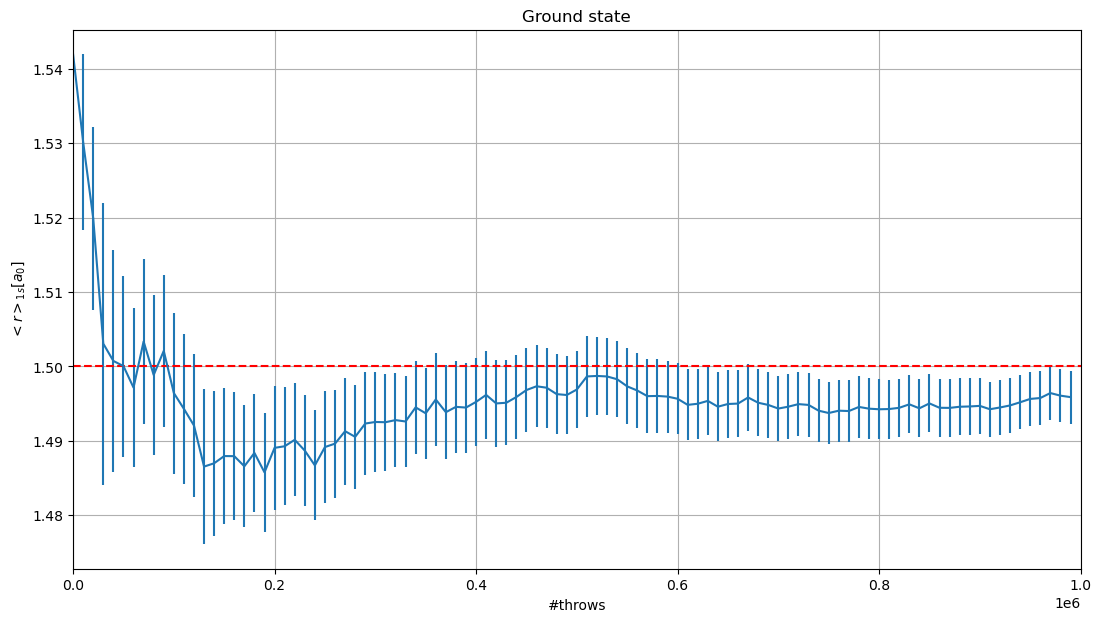

<r/a_0>-3/2 = -0.004 ± 0.004
Acceptance rate : 0.502186


In [16]:
ave_rad_uniform_100 = np.loadtxt("data/5_1_uni_psi100_ave.txt")

x = np.arange(N_blocks) * N_throws
y = blocks(ave_rad_uniform_100)
plt.figure(figsize=(13,7))
plt.errorbar(x, y[:,0], yerr=y[:,1])
plt.title("Ground state")
plt.hlines(1.5, 0, 1e6, colors='r', linestyles='dashed')
plt.xlim(0, 1e6)
plt.xlabel("#throws")
plt.ylabel("$<r>_{1s} [a_0]$")
plt.grid(True)
plt.show()
print(f"<r/a_0>-3/2 = {y[-1, 0]-3/2:.3f} ± {y[-1, 1]:.3f}")
print(f"Acceptance rate : {acc_uni_100}")

/tmp/ipykernel_22186/1292958574.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


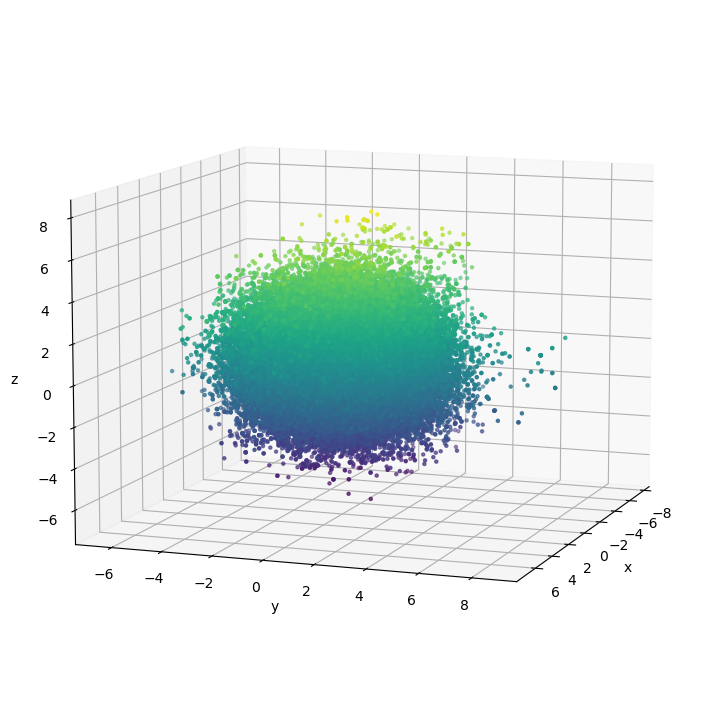

In [17]:
x, y, z = np.loadtxt("data/5_1_uni_psi100.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
fig = plt.figure(figsize = (13, 7))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 20)
plt.show()

Estimate $\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0$ and its statistical uncertainties

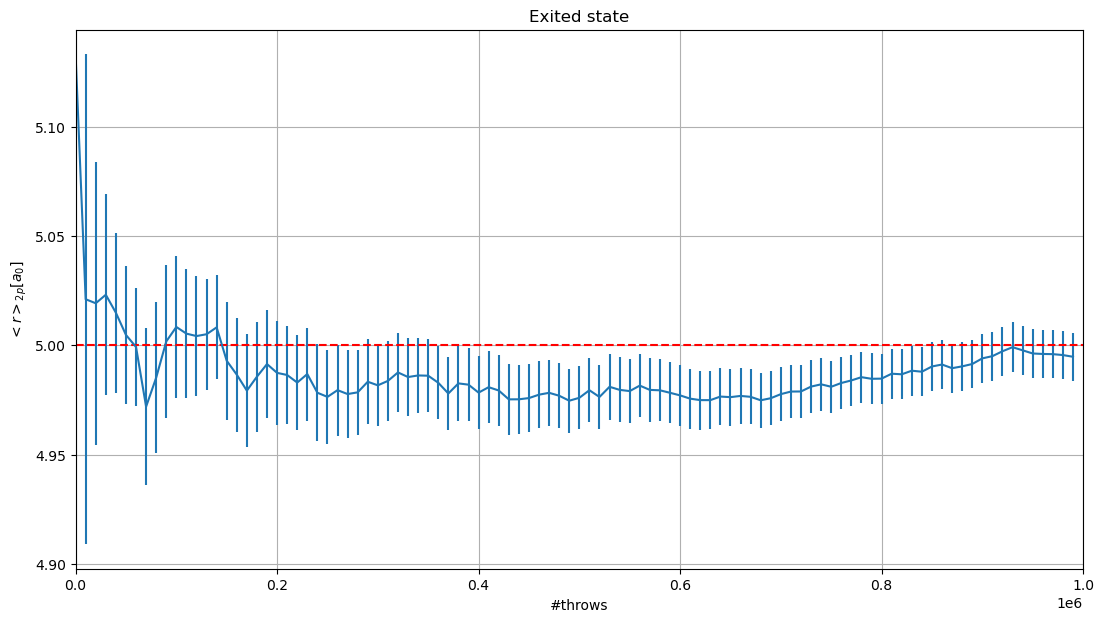

<r/a_0> - 5 = -0.005 ± 0.011
Acceptance rate : 0.501182


In [18]:
ave_rad_uniform_210 = np.loadtxt("data/5_1_uni_psi210_ave.txt")

x = np.arange(N_blocks) * N_throws
y = blocks(ave_rad_uniform_210)
plt.figure(figsize=(13,7))
plt.errorbar(x, y[:,0], yerr=y[:,1])
plt.title("Exited state")
plt.hlines(5, 0, 1e6, colors='r', linestyles='dashed')
plt.xlim(0, 1e6)
plt.xlabel("#throws")
plt.ylabel("$<r>_{2p} [a_0]$")
plt.grid(True)
plt.show()
print(f"<r/a_0> - 5 = {y[-1, 0]-5:.3f} ± {y[-1, 1]:.3f}")
print(f"Acceptance rate : {acc_uni_210}")

/tmp/ipykernel_22186/2821709993.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


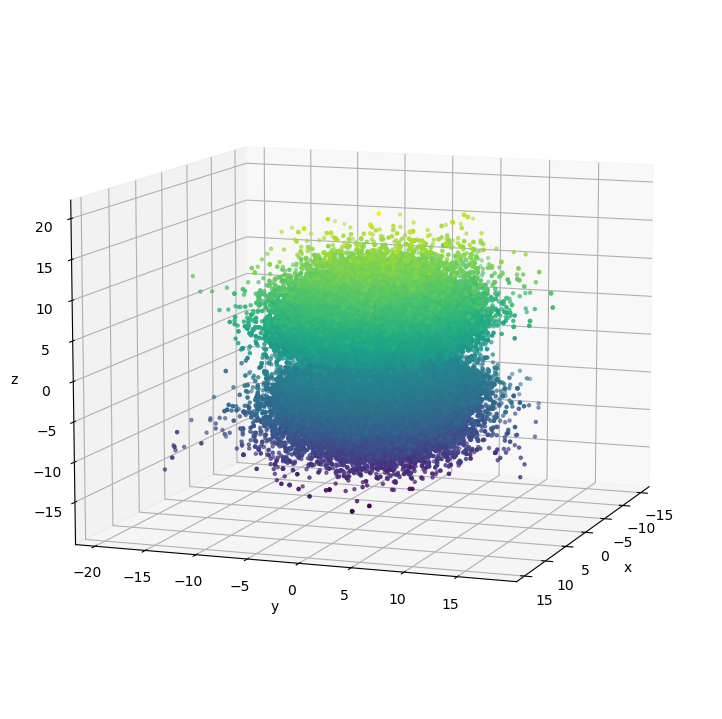

In [19]:
x, y, z = np.loadtxt("data/5_1_uni_psi210.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
fig = plt.figure(figsize = (13, 7))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 20)
plt.show()

### 5.1.2

We sample with **multivariate normal** transition probability $T(\vec{x}|\vec{y})$.

Estimate of $\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0$ and its statistical uncertainties

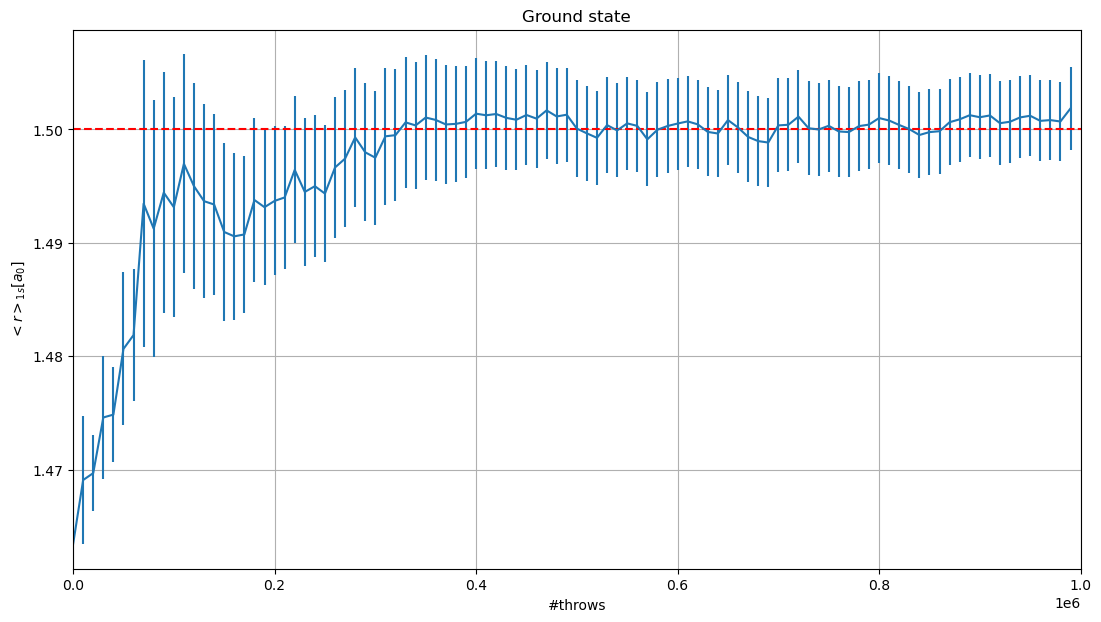

<r/a_0> - 3/2 = 0.002 ± 0.004
Acceptance rate : 0.500355


In [20]:
ave_rad_gaussian_100 = np.loadtxt("data/5_1_gauss_psi100_ave.txt")

x = np.arange(N_blocks) * N_throws
y = blocks(ave_rad_gaussian_100)
plt.figure(figsize=(13,7))
plt.errorbar(x, y[:,0], yerr=y[:,1])
plt.title("Ground state")
plt.hlines(1.5, 0, 1e6, colors='r', linestyles='dashed')
plt.xlim(0, 1e6)
plt.xlabel("#throws")
plt.ylabel("$<r>_{1s} [a_0]$")
plt.grid(True)
plt.show()
print(f"<r/a_0> - 3/2 = {y[-1, 0]-3/2:.3f} ± {y[-1, 1]:.3f}")
print(f"Acceptance rate : {acc_gauss_100}")

/tmp/ipykernel_22186/44915326.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


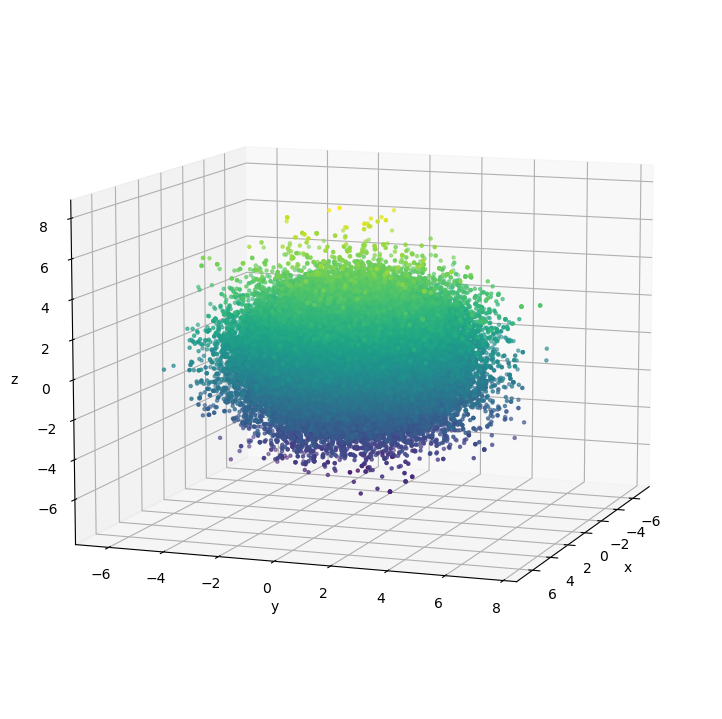

In [21]:
x, y, z = np.loadtxt("data/5_1_gauss_psi100.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
fig = plt.figure(figsize = (13, 7))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 20)
plt.show()

Estimate $\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0$ and its statistical uncertainties

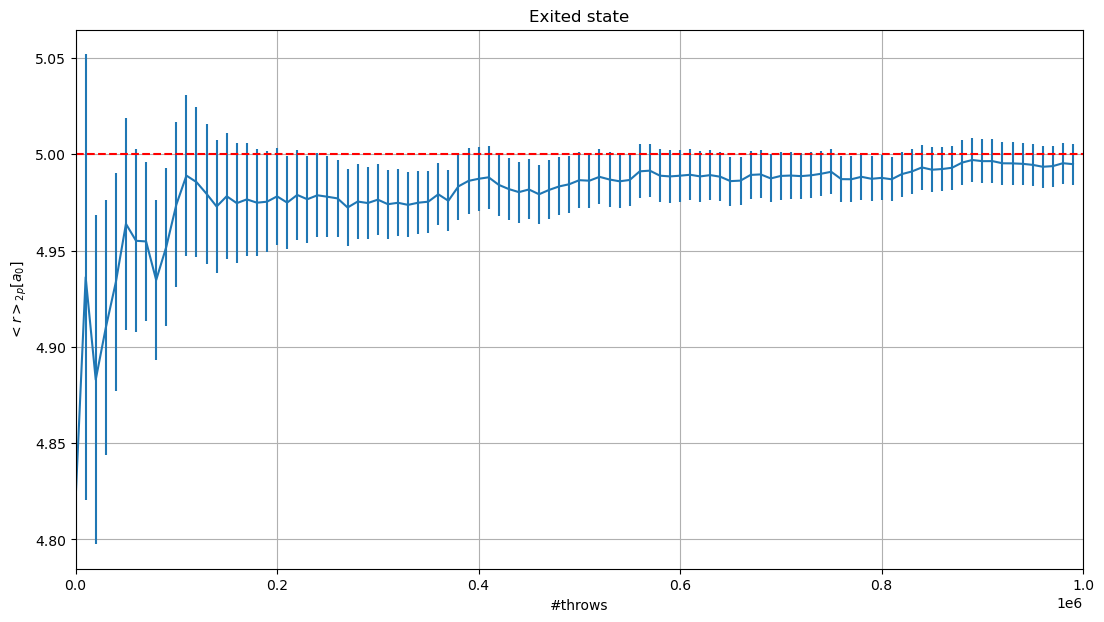

<r/a_0> - 5 = -0.005 ± 0.011
Acceptance rate : 0.500355


In [22]:
ave_rad_gaussian_210 = np.loadtxt("data/5_1_gauss_psi210_ave.txt")

x = np.arange(N_blocks) * N_throws
y = blocks(ave_rad_gaussian_210)
plt.figure(figsize=(13,7))
plt.errorbar(x, y[:,0], yerr=y[:,1])
plt.title("Exited state")
plt.hlines(5, 0, 1e6, colors='r', linestyles='dashed')
plt.xlim(0, 1e6)
plt.xlabel("#throws")
plt.ylabel("$<r>_{2p} [a_0]$")
plt.grid(True)
plt.show()
print(f"<r/a_0> - 5 = {y[-1, 0]-5:.3f} ± {y[-1, 1]:.3f}")
print(f"Acceptance rate : {acc_gauss_100}")

/tmp/ipykernel_22186/3079227326.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


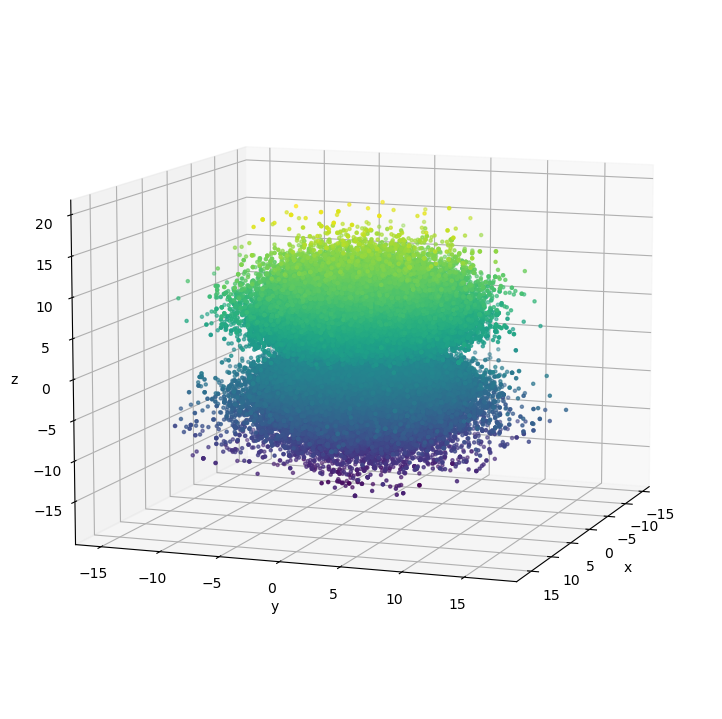

In [23]:
x, y, z = np.loadtxt("data/5_1_gauss_psi210.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
fig = plt.figure(figsize = (13, 7))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 20)
plt.show()

Both results with multinormal transition probability are compatible with the results with uniform transition probability. The statistical errors are 
equivalent.